## CAPSTONE PROJECT

#### Using Deep Learning to Classify and Analyse Musical Instruments Based on Spectrograms and Audio Features

In [1]:
# Importing libraries

import matplotlib.pyplot as plt


In [2]:
# Importing libraries
import os
import librosa
import librosa.display
import glob

In [3]:
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

###### Renaming subfolders and showing number of audio files in each subfolder

In [4]:

# Define the mapping of old names to new names
name_mapping = {
    "cel": "cello",
    "cla": "clarinet",
    "flu": "flute",
    "gac": "guitar_acoustic",
    "gel": "guitar_electric",
    "org": "organ",
    "pia": "piano",
    "sax": "saxophone",
    "tru": "trumpet",
    "vio": "violin",
    "voi": "vocals"
}

# Get a list of all subfolders in the dataset root directory
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

# Rename the subfolders according to the name_mapping dictionary and show the number of audio files
for subfolder in subfolders:
    if subfolder in name_mapping:
        # New name for the subfolder
        new_name = name_mapping[subfolder]

        # Get the path of the current subfolder
        subfolder_path = os.path.join(folder_path, subfolder)

        # Get the path of the new subfolder name
        new_subfolder_path = os.path.join(folder_path, new_name)

        # Rename the subfolder
        os.rename(subfolder_path, new_subfolder_path)

# Get a list of all subfolders (new names) in the dataset root directory
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

# Count the number of audio files in each subfolder and display the results
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    # Get a list of audio files in the subfolder (assuming they have a certain file extension, e.g., .wav)
    audio_files = glob.glob(os.path.join(subfolder_path, '*.wav'))
    # Print the new name of the subfolder and the number of audio files in it
    print(f"{subfolder} {len(audio_files)}")




cello 388
clarinet 505
flute 451
guitar_acoustic 637
guitar_electric 760
organ 682
piano 721
saxophone 626
trumpet 577
violin 580
vocals 778


### Select specific instruments

In [5]:
import pandas as pd

# The selected instruments you want to include in the data frame
selected_instruments = ["flute","guitar_acoustic","piano", "trumpet","violin"]

# Initialize an empty list to store the data for selected instruments
selected_instruments_data = []

# Loop through the subfolders and collect data for selected instruments
for subfolder in subfolders:
    # Get the instrument name and the number of audio files
    instrument, num_audio_files = subfolder, len(glob.glob(os.path.join(folder_path, subfolder, '*.wav')))
    # Check if the instrument is in the selected instruments list
    if instrument in selected_instruments:
        # Append the data to the selected_instruments_data list
        selected_instruments_data.append((instrument, num_audio_files))

# Create a data frame from the selected_instruments_data list
df = pd.DataFrame(selected_instruments_data, columns=["Instrument", "Num_Audio_Files"])

# Print the data frame
print(df)


        Instrument  Num_Audio_Files
0            flute              451
1  guitar_acoustic              637
2            piano              721
3          trumpet              577
4           violin              580


In [6]:
df.head()

,Instrument,Num_Audio_Files
0,flute,451
1,guitar_acoustic,637
2,piano,721
3,trumpet,577
4,violin,580


### Renaming audio files in subfolders

In [7]:
import os
import pandas as pd

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize an empty list to store the data for selected instruments
selected_instruments_data = []

# Loop through the subfolders and collect data for selected instruments
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)):
        # Get the instrument name and the number of audio files
        instrument, num_audio_files = subfolder, len(glob.glob(os.path.join(folder_path, subfolder, '*.wav')))
        # Check if the instrument is in the selected instruments list
        if instrument in selected_instruments:
            # Append the data to the selected_instruments_data list
            selected_instruments_data.append((instrument, num_audio_files))

# Create a data frame from the selected_instruments_data list
df = pd.DataFrame(selected_instruments_data, columns=["Instrument", "Num_Audio_Files"])

# Print the data frame
print(df)

# Renaming audio files in each subfolder based on the subfolder name (instrument name)
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for i, audio_file in enumerate(audio_files):
            # Extract the file extension (assuming all audio files have the '.wav' extension)
            file_name, file_extension = os.path.splitext(audio_file)
            new_file_name = f"{instrument_name}_{i + 1}{file_extension}"
            old_file_path = os.path.join(subfolder_path, audio_file)
            new_file_path = os.path.join(subfolder_path, new_file_name)

            # Check if the new name already exists, if so, skip renaming this file
            if not os.path.exists(new_file_path):
                os.rename(old_file_path, new_file_path)

# Separate code to display the names given to the audio files in each subfolder
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        print(f"Audio files in {instrument_name} subfolder:")
        for audio_file in audio_files:
            print(audio_file)


        Instrument  Num_Audio_Files
0            flute              451
1  guitar_acoustic              637
2            piano              721
3          trumpet              577
4           violin              580
Audio files in flute subfolder:
flute_1.wav
flute_10.wav
flute_100.wav
flute_101.wav
flute_102.wav
flute_103.wav
flute_104.wav
flute_105.wav
flute_106.wav
flute_107.wav
flute_108.wav
flute_109.wav
flute_11.wav
flute_110.wav
flute_111.wav
flute_112.wav
flute_113.wav
flute_114.wav
flute_115.wav
flute_116.wav
flute_117.wav
flute_118.wav
flute_119.wav
flute_12.wav
flute_120.wav
flute_121.wav
flute_122.wav
flute_123.wav
flute_124.wav
flute_125.wav
flute_126.wav
flute_127.wav
flute_128.wav
flute_129.wav
flute_13.wav
flute_130.wav
flute_131.wav
flute_132.wav
flute_133.wav
flute_134.wav
flute_135.wav
flute_136.wav
flute_137.wav
flute_138.wav
flute_139.wav
flute_14.wav
flute_140.wav
flute_141.wav
flute_142.wav
flute_143.wav
flute_144.wav
flute_145.wav
flute_146.wav
flute_147.wav
flu

piano_494.wav
piano_495.wav
piano_496.wav
piano_497.wav
piano_498.wav
piano_499.wav
piano_5.wav
piano_50.wav
piano_500.wav
piano_501.wav
piano_502.wav
piano_503.wav
piano_504.wav
piano_505.wav
piano_506.wav
piano_507.wav
piano_508.wav
piano_509.wav
piano_51.wav
piano_510.wav
piano_511.wav
piano_512.wav
piano_513.wav
piano_514.wav
piano_515.wav
piano_516.wav
piano_517.wav
piano_518.wav
piano_519.wav
piano_52.wav
piano_520.wav
piano_521.wav
piano_522.wav
piano_523.wav
piano_524.wav
piano_525.wav
piano_526.wav
piano_527.wav
piano_528.wav
piano_529.wav
piano_53.wav
piano_530.wav
piano_531.wav
piano_532.wav
piano_533.wav
piano_534.wav
piano_535.wav
piano_536.wav
piano_537.wav
piano_538.wav
piano_539.wav
piano_54.wav
piano_540.wav
piano_541.wav
piano_542.wav
piano_543.wav
piano_544.wav
piano_545.wav
piano_546.wav
piano_547.wav
piano_548.wav
piano_549.wav
piano_55.wav
piano_550.wav
piano_551.wav
piano_552.wav
piano_553.wav
piano_554.wav
piano_555.wav
piano_556.wav
piano_557.wav
piano_558.wav


### Extracting audio features (MFCC)

In [8]:
import os
import pandas as pd
import librosa
import numpy as np

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the data frame containing the extracted features
print(features_df)


               0           1          2          3          4          5  \
0    -337.473877  163.391022 -20.792271 -19.704060 -15.508782 -17.194130   
1    -587.939636  149.929626   2.321452  -5.284139  -3.358227  -0.641348   
2    -353.503967  154.534302 -31.533834   8.909912  -2.078460  -7.813954   
3    -205.111465  111.030457   2.548643  32.414116  10.945980  14.296842   
4    -317.589752  188.804001  -0.964652   5.812916  -4.185506  -0.620454   
...          ...         ...        ...        ...        ...        ...   
2961 -378.759308  108.300713  38.268433  15.579978 -11.428860  21.879665   
2962 -360.374603  161.672287  43.577587  24.669422  -3.353702  10.950603   
2963 -322.313812  147.023041 -22.988264  43.484108  -0.477000  12.404605   
2964 -368.728058  110.897881 -20.038116  39.989010  -0.545460   9.764439   
2965 -311.952759  148.352707 -20.774620  43.184555   2.407995  12.982420   

              6          7          8          9  ...         11         12  \
0    -20

In [9]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Instrument
0,-337.473877,163.391022,-20.792271,-19.704060,-15.508782,-17.194130,-20.047249,-34.314190,-27.674982,-7.780355,...,-7.041254,-16.858717,-11.920739,-4.776387,1.412398,2.682719,-2.022217,-19.741196,-2.928354,flute
1,-587.939636,149.929626,2.321452,-5.284139,-3.358227,-0.641348,-8.874627,-6.474707,1.254965,-2.419511,...,-19.099936,-7.265344,5.862196,11.180741,7.640589,2.175667,-6.319725,-13.854408,-5.021900,flute
2,-353.503967,154.534302,-31.533834,8.909912,-2.078460,-7.813954,-3.339204,10.847145,14.385180,13.026170,...,-11.201878,-19.713562,-14.275689,1.014357,6.960124,1.048140,8.968916,13.460876,11.286994,flute
3,-205.111465,111.030457,2.548643,32.414116,10.945980,14.296842,-10.790370,-5.864502,-9.819433,-2.676086,...,-10.637012,-12.004656,0.687497,-1.526588,8.812408,-7.393153,-15.778409,-14.270913,-9.941313,flute
4,-317.589752,188.804001,-0.964652,5.812916,-4.185506,-0.620454,-0.792919,2.686776,-4.365325,-11.412307,...,-2.898510,-1.754175,-9.367742,-13.166235,-5.413828,-7.455189,-7.187279,-3.036609,-12.114229,flute


### Names of extracted audio features

In [10]:
# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the names of the extracted audio features
print("Names of the extracted audio features:")
print(features_df.columns[:-1])


Names of the extracted audio features:
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='object')


In [11]:
# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Define column names for the extracted features
column_names = [f"MFCC_{i}" for i in range(features_list[0].shape[0])]

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list, columns=column_names)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the names of the extracted audio features
print("Names of the extracted audio features:")
print(features_df.columns[:-1])


Names of the extracted audio features:
Index(['MFCC_0', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6',
       'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12',
       'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18',
       'MFCC_19'],
      dtype='object')


### Getting the extracted audio feature of the first audio file

In [12]:
# Get the MFCCs for the first audio file (row 0)
mfcc_values = features_df.iloc[0, :-1]

# Print the MFCC values
print("MFCC values for the first audio file:")
print(mfcc_values)


MFCC values for the first audio file:
MFCC_0    -337.473877
MFCC_1     163.391022
MFCC_2     -20.792271
MFCC_3      -19.70406
MFCC_4     -15.508782
MFCC_5      -17.19413
MFCC_6     -20.047249
MFCC_7      -34.31419
MFCC_8     -27.674982
MFCC_9      -7.780355
MFCC_10     -0.370031
MFCC_11     -7.041254
MFCC_12    -16.858717
MFCC_13    -11.920739
MFCC_14     -4.776387
MFCC_15      1.412398
MFCC_16      2.682719
MFCC_17     -2.022217
MFCC_18    -19.741196
MFCC_19     -2.928354
Name: 0, dtype: object


### Summary statistics of the audio features

            MFCC_0       MFCC_1       MFCC_2       MFCC_3       MFCC_4  \
count  2966.000000  2966.000000  2966.000000  2966.000000  2966.000000   
mean   -253.786407   132.772079   -12.447688    25.020216     0.466866   
std     118.135002    43.867023    29.417837    17.184757    12.646667   
min    -669.590393   -39.857330  -118.332298   -58.788082   -47.055012   
25%    -332.176537    99.271046   -31.358914    14.958356    -7.488994   
50%    -251.018501   130.635742   -10.676118    25.777993     1.091303   
75%    -165.921276   166.345688     7.366829    35.672363     9.166029   
max      44.041443   254.003128    79.855347    90.423119    45.894112   

            MFCC_5       MFCC_6       MFCC_7       MFCC_8       MFCC_9  \
count  2966.000000  2966.000000  2966.000000  2966.000000  2966.000000   
mean      4.941574    -3.364677     0.601161    -5.275538    -1.145046   
std      10.915119     9.518309     8.849741     7.831412     8.196423   
min     -39.645996   -43.904381   -37

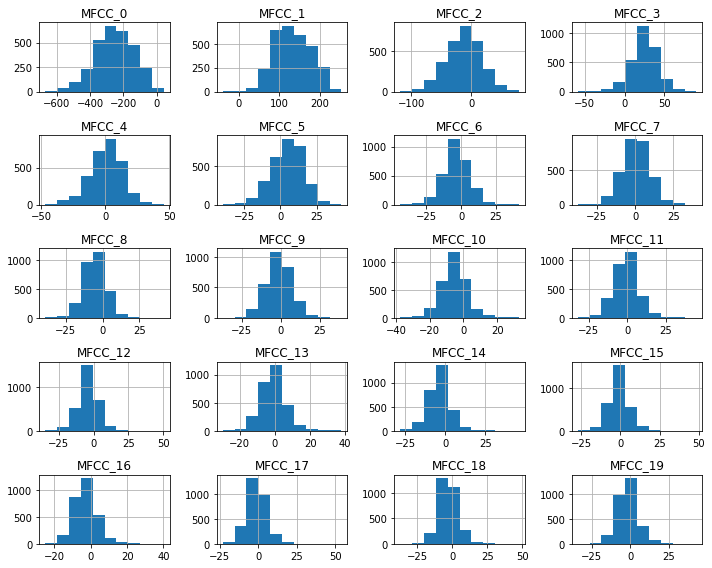

In [13]:
# Summary statistics of the numerical columns
print(features_df.describe())

# Check the data types of columns
print(features_df.dtypes)

# Check the number of instances per instrument class
print(features_df['Instrument'].value_counts())

# Plot histograms of numerical columns
features_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Viewing the audio file waveform and frequency spectrum

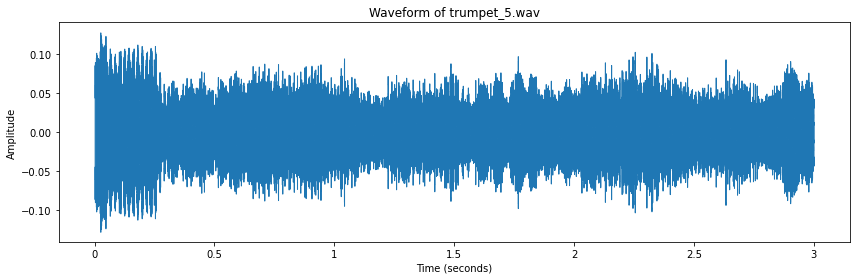

In [14]:
#VIEW THE WAVEFORM OF AN AUDIO FILE 
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instrument and audio file you want to plot (adjust these as needed)
selected_instrument = "trumpet"
selected_audio_file = "trumpet_5.wav"

# Find the path to the selected audio file
audio_file_path = os.path.join(folder_path, selected_instrument, selected_audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_file_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()



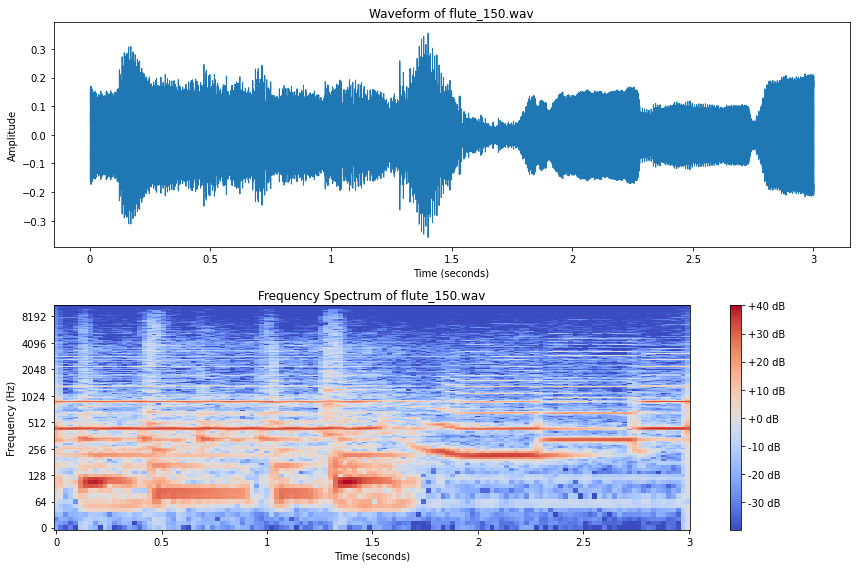

In [15]:
#VIEW THE WAVEFORM AND FREQUENCY OF AN AUDIO FILE
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instrument and audio file you want to plot (adjust these as needed)
selected_instrument = "flute"
selected_audio_file = "flute_150.wav"

# Find the path to the selected audio file
audio_file_path = os.path.join(folder_path, selected_instrument, selected_audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_file_path)

# Create a time axis for the waveform plot
time = librosa.times_like(y, sr=sr)

# Create a figure with two subplots (for waveform and frequency spectrum)
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Compute the Short-Time Fourier Transform (STFT) to get the magnitude spectrum
stft = librosa.stft(y)
mag, _ = librosa.magphase(stft)

# Convert magnitude to decibels (dB) for better visualization
db_mag = librosa.amplitude_to_db(mag)

# Plot the frequency spectrum
plt.subplot(2, 1, 2)
librosa.display.specshow(db_mag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Frequency Spectrum of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


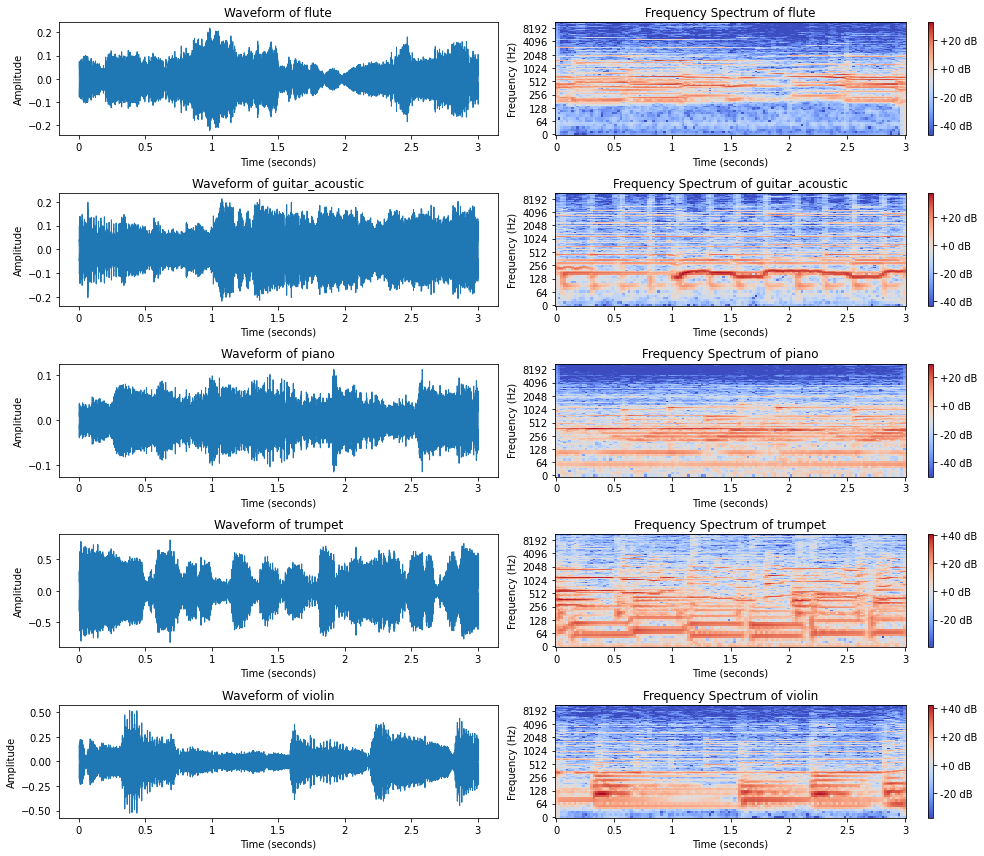

In [16]:
#VIEWING THE WAVEFORM AND FREQUENCY OF THE FIRST AUDIO IN ALL INSTRUMENT FOLDER
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to visualize
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Create a figure with two subplots (for waveform and frequency spectrum)
plt.figure(figsize=(14, 12))

# Loop through the selected instruments
for i, instrument in enumerate(selected_instruments):
    subfolder_path = os.path.join(folder_path, instrument)
    audio_files = os.listdir(subfolder_path)
    
    # Get the path to the first audio file for the current instrument
    audio_file_path = os.path.join(subfolder_path, audio_files[0])
    
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file_path)
    
    # Create a time axis for the waveform plot
    time = librosa.times_like(y, sr=sr)
    
    # Plot the waveform
    plt.subplot(len(selected_instruments), 2, 2 * i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform of {instrument}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    # Compute the Short-Time Fourier Transform (STFT) to get the magnitude spectrum
    stft = librosa.stft(y)
    mag, _ = librosa.magphase(stft)
    
    # Convert magnitude to decibels (dB) for better visualization
    db_mag = librosa.amplitude_to_db(mag)
    
    # Plot the frequency spectrum
    plt.subplot(len(selected_instruments), 2, 2 * i + 2)
    librosa.display.specshow(db_mag, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Frequency Spectrum of {instrument}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


In [17]:
import os
import librosa

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to visualize
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Loop through the selected instruments
for instrument in selected_instruments:
    subfolder_path = os.path.join(folder_path, instrument)
    audio_files = os.listdir(subfolder_path)
    
    # Get the path to the first audio file for the current instrument
    audio_file_path = os.path.join(subfolder_path, audio_files[0])
    
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file_path)
    
    # Convert the sample rate to kHz
    sr_khz = sr / 1000
    
    # Print the sample rate in kHz
    print(f"Sample rate of {audio_files[0]}: {sr_khz:.2f} kHz")


Sample rate of flute_1.wav: 22.05 kHz
Sample rate of guitar_acoustic_1.wav: 22.05 kHz
Sample rate of piano_1.wav: 22.05 kHz
Sample rate of trumpet_1.wav: 22.05 kHz
Sample rate of violin_1.wav: 22.05 kHz


In [18]:
#Showing the sample rate of all the audio files
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to visualize
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Loop through the selected instruments
for instrument in selected_instruments:
    subfolder_path = os.path.join(folder_path, instrument)
    audio_files = os.listdir(subfolder_path)
    
    print(f"Sample rates for {instrument}:")
    
    # Loop through the audio files in the current subfolder
    for audio_file in audio_files:
        # Get the path to the current audio file
        audio_file_path = os.path.join(subfolder_path, audio_file)
        
        # Load the audio file using librosa
        y, sr = librosa.load(audio_file_path)
        
        # Convert the sample rate to kHz
        sr_khz = sr / 1000
        
        # Print the sample rate in kHz for the current audio file
        print(f"{audio_file}: {sr_khz:.2f} kHz")
    
    print()  # Add a blank line between different instruments


Sample rates for flute:
flute_1.wav: 22.05 kHz
flute_10.wav: 22.05 kHz
flute_100.wav: 22.05 kHz
flute_101.wav: 22.05 kHz
flute_102.wav: 22.05 kHz
flute_103.wav: 22.05 kHz
flute_104.wav: 22.05 kHz
flute_105.wav: 22.05 kHz
flute_106.wav: 22.05 kHz
flute_107.wav: 22.05 kHz
flute_108.wav: 22.05 kHz
flute_109.wav: 22.05 kHz
flute_11.wav: 22.05 kHz
flute_110.wav: 22.05 kHz
flute_111.wav: 22.05 kHz
flute_112.wav: 22.05 kHz
flute_113.wav: 22.05 kHz
flute_114.wav: 22.05 kHz
flute_115.wav: 22.05 kHz
flute_116.wav: 22.05 kHz
flute_117.wav: 22.05 kHz
flute_118.wav: 22.05 kHz
flute_119.wav: 22.05 kHz
flute_12.wav: 22.05 kHz
flute_120.wav: 22.05 kHz
flute_121.wav: 22.05 kHz
flute_122.wav: 22.05 kHz
flute_123.wav: 22.05 kHz
flute_124.wav: 22.05 kHz
flute_125.wav: 22.05 kHz
flute_126.wav: 22.05 kHz
flute_127.wav: 22.05 kHz
flute_128.wav: 22.05 kHz
flute_129.wav: 22.05 kHz
flute_13.wav: 22.05 kHz
flute_130.wav: 22.05 kHz
flute_131.wav: 22.05 kHz
flute_132.wav: 22.05 kHz
flute_133.wav: 22.05 kHz
flute_1

flute_401.wav: 22.05 kHz
flute_402.wav: 22.05 kHz
flute_403.wav: 22.05 kHz
flute_404.wav: 22.05 kHz
flute_405.wav: 22.05 kHz
flute_406.wav: 22.05 kHz
flute_407.wav: 22.05 kHz
flute_408.wav: 22.05 kHz
flute_409.wav: 22.05 kHz
flute_41.wav: 22.05 kHz
flute_410.wav: 22.05 kHz
flute_411.wav: 22.05 kHz
flute_412.wav: 22.05 kHz
flute_413.wav: 22.05 kHz
flute_414.wav: 22.05 kHz
flute_415.wav: 22.05 kHz
flute_416.wav: 22.05 kHz
flute_417.wav: 22.05 kHz
flute_418.wav: 22.05 kHz
flute_419.wav: 22.05 kHz
flute_42.wav: 22.05 kHz
flute_420.wav: 22.05 kHz
flute_421.wav: 22.05 kHz
flute_422.wav: 22.05 kHz
flute_423.wav: 22.05 kHz
flute_424.wav: 22.05 kHz
flute_425.wav: 22.05 kHz
flute_426.wav: 22.05 kHz
flute_427.wav: 22.05 kHz
flute_428.wav: 22.05 kHz
flute_429.wav: 22.05 kHz
flute_43.wav: 22.05 kHz
flute_430.wav: 22.05 kHz
flute_431.wav: 22.05 kHz
flute_432.wav: 22.05 kHz
flute_433.wav: 22.05 kHz
flute_434.wav: 22.05 kHz
flute_435.wav: 22.05 kHz
flute_436.wav: 22.05 kHz
flute_437.wav: 22.05 kHz
flu

guitar_acoustic_239.wav: 22.05 kHz
guitar_acoustic_24.wav: 22.05 kHz
guitar_acoustic_240.wav: 22.05 kHz
guitar_acoustic_241.wav: 22.05 kHz
guitar_acoustic_242.wav: 22.05 kHz
guitar_acoustic_243.wav: 22.05 kHz
guitar_acoustic_244.wav: 22.05 kHz
guitar_acoustic_245.wav: 22.05 kHz
guitar_acoustic_246.wav: 22.05 kHz
guitar_acoustic_247.wav: 22.05 kHz
guitar_acoustic_248.wav: 22.05 kHz
guitar_acoustic_249.wav: 22.05 kHz
guitar_acoustic_25.wav: 22.05 kHz
guitar_acoustic_250.wav: 22.05 kHz
guitar_acoustic_251.wav: 22.05 kHz
guitar_acoustic_252.wav: 22.05 kHz
guitar_acoustic_253.wav: 22.05 kHz
guitar_acoustic_254.wav: 22.05 kHz
guitar_acoustic_255.wav: 22.05 kHz
guitar_acoustic_256.wav: 22.05 kHz
guitar_acoustic_257.wav: 22.05 kHz
guitar_acoustic_258.wav: 22.05 kHz
guitar_acoustic_259.wav: 22.05 kHz
guitar_acoustic_26.wav: 22.05 kHz
guitar_acoustic_260.wav: 22.05 kHz
guitar_acoustic_261.wav: 22.05 kHz
guitar_acoustic_262.wav: 22.05 kHz
guitar_acoustic_263.wav: 22.05 kHz
guitar_acoustic_264.wav

guitar_acoustic_464.wav: 22.05 kHz
guitar_acoustic_465.wav: 22.05 kHz
guitar_acoustic_466.wav: 22.05 kHz
guitar_acoustic_467.wav: 22.05 kHz
guitar_acoustic_468.wav: 22.05 kHz
guitar_acoustic_469.wav: 22.05 kHz
guitar_acoustic_47.wav: 22.05 kHz
guitar_acoustic_470.wav: 22.05 kHz
guitar_acoustic_471.wav: 22.05 kHz
guitar_acoustic_472.wav: 22.05 kHz
guitar_acoustic_473.wav: 22.05 kHz
guitar_acoustic_474.wav: 22.05 kHz
guitar_acoustic_475.wav: 22.05 kHz
guitar_acoustic_476.wav: 22.05 kHz
guitar_acoustic_477.wav: 22.05 kHz
guitar_acoustic_478.wav: 22.05 kHz
guitar_acoustic_479.wav: 22.05 kHz
guitar_acoustic_48.wav: 22.05 kHz
guitar_acoustic_480.wav: 22.05 kHz
guitar_acoustic_481.wav: 22.05 kHz
guitar_acoustic_482.wav: 22.05 kHz
guitar_acoustic_483.wav: 22.05 kHz
guitar_acoustic_484.wav: 22.05 kHz
guitar_acoustic_485.wav: 22.05 kHz
guitar_acoustic_486.wav: 22.05 kHz
guitar_acoustic_487.wav: 22.05 kHz
guitar_acoustic_488.wav: 22.05 kHz
guitar_acoustic_489.wav: 22.05 kHz
guitar_acoustic_49.wav

piano_131.wav: 22.05 kHz
piano_132.wav: 22.05 kHz
piano_133.wav: 22.05 kHz
piano_134.wav: 22.05 kHz
piano_135.wav: 22.05 kHz
piano_136.wav: 22.05 kHz
piano_137.wav: 22.05 kHz
piano_138.wav: 22.05 kHz
piano_139.wav: 22.05 kHz
piano_14.wav: 22.05 kHz
piano_140.wav: 22.05 kHz
piano_141.wav: 22.05 kHz
piano_142.wav: 22.05 kHz
piano_143.wav: 22.05 kHz
piano_144.wav: 22.05 kHz
piano_145.wav: 22.05 kHz
piano_146.wav: 22.05 kHz
piano_147.wav: 22.05 kHz
piano_148.wav: 22.05 kHz
piano_149.wav: 22.05 kHz
piano_15.wav: 22.05 kHz
piano_150.wav: 22.05 kHz
piano_151.wav: 22.05 kHz
piano_152.wav: 22.05 kHz
piano_153.wav: 22.05 kHz
piano_154.wav: 22.05 kHz
piano_155.wav: 22.05 kHz
piano_156.wav: 22.05 kHz
piano_157.wav: 22.05 kHz
piano_158.wav: 22.05 kHz
piano_159.wav: 22.05 kHz
piano_16.wav: 22.05 kHz
piano_160.wav: 22.05 kHz
piano_161.wav: 22.05 kHz
piano_162.wav: 22.05 kHz
piano_163.wav: 22.05 kHz
piano_164.wav: 22.05 kHz
piano_165.wav: 22.05 kHz
piano_166.wav: 22.05 kHz
piano_167.wav: 22.05 kHz
pia

piano_436.wav: 22.05 kHz
piano_437.wav: 22.05 kHz
piano_438.wav: 22.05 kHz
piano_439.wav: 22.05 kHz
piano_44.wav: 22.05 kHz
piano_440.wav: 22.05 kHz
piano_441.wav: 22.05 kHz
piano_442.wav: 22.05 kHz
piano_443.wav: 22.05 kHz
piano_444.wav: 22.05 kHz
piano_445.wav: 22.05 kHz
piano_446.wav: 22.05 kHz
piano_447.wav: 22.05 kHz
piano_448.wav: 22.05 kHz
piano_449.wav: 22.05 kHz
piano_45.wav: 22.05 kHz
piano_450.wav: 22.05 kHz
piano_451.wav: 22.05 kHz
piano_452.wav: 22.05 kHz
piano_453.wav: 22.05 kHz
piano_454.wav: 22.05 kHz
piano_455.wav: 22.05 kHz
piano_456.wav: 22.05 kHz
piano_457.wav: 22.05 kHz
piano_458.wav: 22.05 kHz
piano_459.wav: 22.05 kHz
piano_46.wav: 22.05 kHz
piano_460.wav: 22.05 kHz
piano_461.wav: 22.05 kHz
piano_462.wav: 22.05 kHz
piano_463.wav: 22.05 kHz
piano_464.wav: 22.05 kHz
piano_465.wav: 22.05 kHz
piano_466.wav: 22.05 kHz
piano_467.wav: 22.05 kHz
piano_468.wav: 22.05 kHz
piano_469.wav: 22.05 kHz
piano_47.wav: 22.05 kHz
piano_470.wav: 22.05 kHz
piano_471.wav: 22.05 kHz
pian

piano_90.wav: 22.05 kHz
piano_91.wav: 22.05 kHz
piano_92.wav: 22.05 kHz
piano_93.wav: 22.05 kHz
piano_94.wav: 22.05 kHz
piano_95.wav: 22.05 kHz
piano_96.wav: 22.05 kHz
piano_97.wav: 22.05 kHz
piano_98.wav: 22.05 kHz
piano_99.wav: 22.05 kHz

Sample rates for trumpet:
trumpet_1.wav: 22.05 kHz
trumpet_10.wav: 22.05 kHz
trumpet_100.wav: 22.05 kHz
trumpet_101.wav: 22.05 kHz
trumpet_102.wav: 22.05 kHz
trumpet_103.wav: 22.05 kHz
trumpet_104.wav: 22.05 kHz
trumpet_105.wav: 22.05 kHz
trumpet_106.wav: 22.05 kHz
trumpet_107.wav: 22.05 kHz
trumpet_108.wav: 22.05 kHz
trumpet_109.wav: 22.05 kHz
trumpet_11.wav: 22.05 kHz
trumpet_110.wav: 22.05 kHz
trumpet_111.wav: 22.05 kHz
trumpet_112.wav: 22.05 kHz
trumpet_113.wav: 22.05 kHz
trumpet_114.wav: 22.05 kHz
trumpet_115.wav: 22.05 kHz
trumpet_116.wav: 22.05 kHz
trumpet_117.wav: 22.05 kHz
trumpet_118.wav: 22.05 kHz
trumpet_119.wav: 22.05 kHz
trumpet_12.wav: 22.05 kHz
trumpet_120.wav: 22.05 kHz
trumpet_121.wav: 22.05 kHz
trumpet_122.wav: 22.05 kHz
trumpet_1

trumpet_391.wav: 22.05 kHz
trumpet_392.wav: 22.05 kHz
trumpet_393.wav: 22.05 kHz
trumpet_394.wav: 22.05 kHz
trumpet_395.wav: 22.05 kHz
trumpet_396.wav: 22.05 kHz
trumpet_397.wav: 22.05 kHz
trumpet_398.wav: 22.05 kHz
trumpet_399.wav: 22.05 kHz
trumpet_4.wav: 22.05 kHz
trumpet_40.wav: 22.05 kHz
trumpet_400.wav: 22.05 kHz
trumpet_401.wav: 22.05 kHz
trumpet_402.wav: 22.05 kHz
trumpet_403.wav: 22.05 kHz
trumpet_404.wav: 22.05 kHz
trumpet_405.wav: 22.05 kHz
trumpet_406.wav: 22.05 kHz
trumpet_407.wav: 22.05 kHz
trumpet_408.wav: 22.05 kHz
trumpet_409.wav: 22.05 kHz
trumpet_41.wav: 22.05 kHz
trumpet_410.wav: 22.05 kHz
trumpet_411.wav: 22.05 kHz
trumpet_412.wav: 22.05 kHz
trumpet_413.wav: 22.05 kHz
trumpet_414.wav: 22.05 kHz
trumpet_415.wav: 22.05 kHz
trumpet_416.wav: 22.05 kHz
trumpet_417.wav: 22.05 kHz
trumpet_418.wav: 22.05 kHz
trumpet_419.wav: 22.05 kHz
trumpet_42.wav: 22.05 kHz
trumpet_420.wav: 22.05 kHz
trumpet_421.wav: 22.05 kHz
trumpet_422.wav: 22.05 kHz
trumpet_423.wav: 22.05 kHz
trumpe

violin_178.wav: 22.05 kHz
violin_179.wav: 22.05 kHz
violin_18.wav: 22.05 kHz
violin_180.wav: 22.05 kHz
violin_181.wav: 22.05 kHz
violin_182.wav: 22.05 kHz
violin_183.wav: 22.05 kHz
violin_184.wav: 22.05 kHz
violin_185.wav: 22.05 kHz
violin_186.wav: 22.05 kHz
violin_187.wav: 22.05 kHz
violin_188.wav: 22.05 kHz
violin_189.wav: 22.05 kHz
violin_19.wav: 22.05 kHz
violin_190.wav: 22.05 kHz
violin_191.wav: 22.05 kHz
violin_192.wav: 22.05 kHz
violin_193.wav: 22.05 kHz
violin_194.wav: 22.05 kHz
violin_195.wav: 22.05 kHz
violin_196.wav: 22.05 kHz
violin_197.wav: 22.05 kHz
violin_198.wav: 22.05 kHz
violin_199.wav: 22.05 kHz
violin_2.wav: 22.05 kHz
violin_20.wav: 22.05 kHz
violin_200.wav: 22.05 kHz
violin_201.wav: 22.05 kHz
violin_202.wav: 22.05 kHz
violin_203.wav: 22.05 kHz
violin_204.wav: 22.05 kHz
violin_205.wav: 22.05 kHz
violin_206.wav: 22.05 kHz
violin_207.wav: 22.05 kHz
violin_208.wav: 22.05 kHz
violin_209.wav: 22.05 kHz
violin_21.wav: 22.05 kHz
violin_210.wav: 22.05 kHz
violin_211.wav: 22

violin_48.wav: 22.05 kHz
violin_480.wav: 22.05 kHz
violin_481.wav: 22.05 kHz
violin_482.wav: 22.05 kHz
violin_483.wav: 22.05 kHz
violin_484.wav: 22.05 kHz
violin_485.wav: 22.05 kHz
violin_486.wav: 22.05 kHz
violin_487.wav: 22.05 kHz
violin_488.wav: 22.05 kHz
violin_489.wav: 22.05 kHz
violin_49.wav: 22.05 kHz
violin_490.wav: 22.05 kHz
violin_491.wav: 22.05 kHz
violin_492.wav: 22.05 kHz
violin_493.wav: 22.05 kHz
violin_494.wav: 22.05 kHz
violin_495.wav: 22.05 kHz
violin_496.wav: 22.05 kHz
violin_497.wav: 22.05 kHz
violin_498.wav: 22.05 kHz
violin_499.wav: 22.05 kHz
violin_5.wav: 22.05 kHz
violin_50.wav: 22.05 kHz
violin_500.wav: 22.05 kHz
violin_501.wav: 22.05 kHz
violin_502.wav: 22.05 kHz
violin_503.wav: 22.05 kHz
violin_504.wav: 22.05 kHz
violin_505.wav: 22.05 kHz
violin_506.wav: 22.05 kHz
violin_507.wav: 22.05 kHz
violin_508.wav: 22.05 kHz
violin_509.wav: 22.05 kHz
violin_51.wav: 22.05 kHz
violin_510.wav: 22.05 kHz
violin_511.wav: 22.05 kHz
violin_512.wav: 22.05 kHz
violin_513.wav: 22

## Build a SVM model with the extracted audio feature (MFCC)

In [21]:
features_df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Instrument
0,-337.473877,163.391022,-20.792271,-19.704060,-15.508782,-17.194130,-20.047249,-34.314190,-27.674982,-7.780355,...,-7.041254,-16.858717,-11.920739,-4.776387,1.412398,2.682719,-2.022217,-19.741196,-2.928354,flute
1,-587.939636,149.929626,2.321452,-5.284139,-3.358227,-0.641348,-8.874627,-6.474707,1.254965,-2.419511,...,-19.099936,-7.265344,5.862196,11.180741,7.640589,2.175667,-6.319725,-13.854408,-5.021900,flute
2,-353.503967,154.534302,-31.533834,8.909912,-2.078460,-7.813954,-3.339204,10.847145,14.385180,13.026170,...,-11.201878,-19.713562,-14.275689,1.014357,6.960124,1.048140,8.968916,13.460876,11.286994,flute
3,-205.111465,111.030457,2.548643,32.414116,10.945980,14.296842,-10.790370,-5.864502,-9.819433,-2.676086,...,-10.637012,-12.004656,0.687497,-1.526588,8.812408,-7.393153,-15.778409,-14.270913,-9.941313,flute
4,-317.589752,188.804001,-0.964652,5.812916,-4.185506,-0.620454,-0.792919,2.686776,-4.365325,-11.412307,...,-2.898510,-1.754175,-9.367742,-13.166235,-5.413828,-7.455189,-7.187279,-3.036609,-12.114229,flute


In [24]:
import pandas as pd
# Reorder columns with "Instrument" as the first column
column_order = ['Instrument'] + [col for col in features_df.columns if col != 'Instrument']
features_df = features_df[column_order]



In [27]:
features_df.head()

,Instrument,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,flute,-337.473877,163.391022,-20.792271,-19.704060,-15.508782,-17.194130,-20.047249,-34.314190,-27.674982,...,-0.370031,-7.041254,-16.858717,-11.920739,-4.776387,1.412398,2.682719,-2.022217,-19.741196,-2.928354
1,flute,-587.939636,149.929626,2.321452,-5.284139,-3.358227,-0.641348,-8.874627,-6.474707,1.254965,...,-14.215206,-19.099936,-7.265344,5.862196,11.180741,7.640589,2.175667,-6.319725,-13.854408,-5.021900
2,flute,-353.503967,154.534302,-31.533834,8.909912,-2.078460,-7.813954,-3.339204,10.847145,14.385180,...,-0.500721,-11.201878,-19.713562,-14.275689,1.014357,6.960124,1.048140,8.968916,13.460876,11.286994
3,flute,-205.111465,111.030457,2.548643,32.414116,10.945980,14.296842,-10.790370,-5.864502,-9.819433,...,-16.879379,-10.637012,-12.004656,0.687497,-1.526588,8.812408,-7.393153,-15.778409,-14.270913,-9.941313
4,flute,-317.589752,188.804001,-0.964652,5.812916,-4.185506,-0.620454,-0.792919,2.686776,-4.365325,...,-13.466372,-2.898510,-1.754175,-9.367742,-13.166235,-5.413828,-7.455189,-7.187279,-3.036609,-12.114229


# Convert Audio Features to Spectrograms (Mel Spectrograms)

Converting audio files to mel spectrograms for flute...


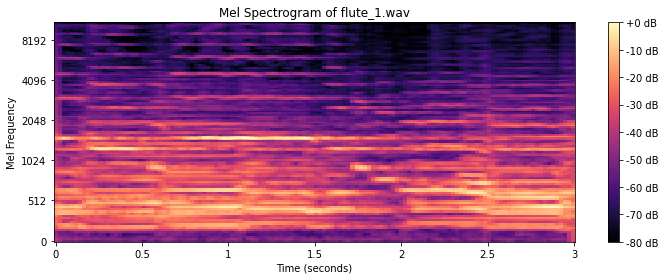


Converting audio files to mel spectrograms for guitar_acoustic...


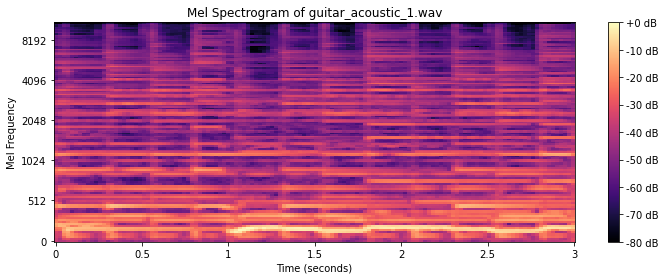


Converting audio files to mel spectrograms for piano...


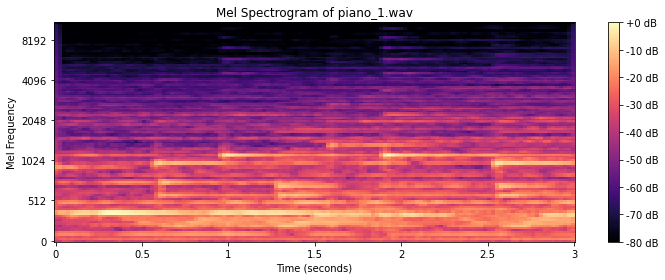


Converting audio files to mel spectrograms for trumpet...


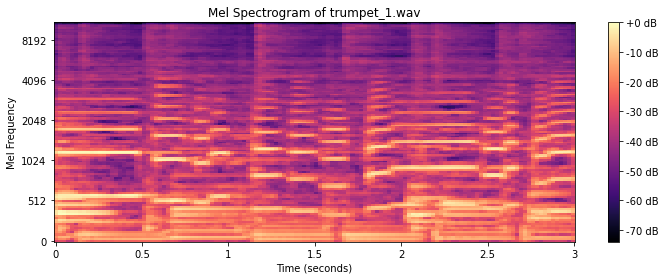


Converting audio files to mel spectrograms for violin...


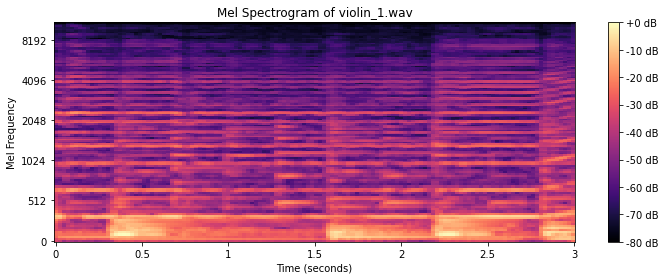

In [19]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

for instrument in selected_instruments:
    subfolder_path = os.path.join(folder_path, instrument)
    audio_files = os.listdir(subfolder_path)
    
    print(f"Converting audio files to mel spectrograms for {instrument}...")
    
    for audio_file in audio_files:
        audio_file_path = os.path.join(subfolder_path, audio_file)
        y, sr = librosa.load(audio_file_path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram of {audio_file}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Mel Frequency")
        plt.tight_layout()
        plt.show()
        
        break  # Display only one spectrogram per instrument
    print()


In [20]:

import os
import librosa
import librosa.display
import numpy as np


folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

for instrument in selected_instruments:
    subfolder_path = os.path.join(folder_path, instrument)
    audio_files = os.listdir(subfolder_path)
    
    print(f"Converting audio files to mel spectrograms for {instrument}...")
    
    # Create a directory to save the spectrogram images for the current instrument
    save_path = os.path.join('C:\\Users\\user\\Desktop\\capstone\\spectrogram_images', instrument)
    os.makedirs(save_path, exist_ok=True)
    
    # Check if spectrograms for this instrument have already been saved
    saved_spectrograms = os.listdir(save_path)
    if len(saved_spectrograms) == len(audio_files):
        print(f"Spectrograms for {instrument} are already saved. Skipping.")
        continue
    
    for audio_file in audio_files:
        audio_file_path = os.path.join(subfolder_path, audio_file)
        y, sr = librosa.load(audio_file_path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram of {audio_file}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Mel Frequency")
        plt.tight_layout()
        
        specgram_path = os.path.join(save_path, f"{os.path.splitext(audio_file)[0]}.png")
        plt.savefig(specgram_path)
        plt.close()
        
    print()  # Add a blank line between different instruments


Converting audio files to mel spectrograms for flute...
Spectrograms for flute are already saved. Skipping.
Converting audio files to mel spectrograms for guitar_acoustic...
Spectrograms for guitar_acoustic are already saved. Skipping.
Converting audio files to mel spectrograms for piano...
Spectrograms for piano are already saved. Skipping.
Converting audio files to mel spectrograms for trumpet...
Spectrograms for trumpet are already saved. Skipping.
Converting audio files to mel spectrograms for violin...
Spectrograms for violin are already saved. Skipping.
